Delta:  0.1
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  0.675
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  1.2500000000000002
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  1.8250000000000002
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  2.4000000000000004
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  2.9750000000000005
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  3.5500000000000003
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.125
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.7
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  5.275
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  5.8500000000000005
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  6.425000000000001
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  7.0
Run:  0
Run:  25
Run:  50
Run:  75
[0.4621831035394257, 0.4935017650394851, 0.5251437202777273, 0.5616332746090509, 0.5935894884090558, 0.6320871579303914, 0.6729572700845108, 0.7214878114519765, 0.8448256827760366, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 0, '$m_{test} / m_{QGT}$')

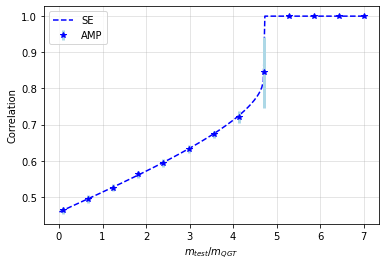

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 14:56:53 2023

Made for the Linear QGT problem by: pp423

Modified for the Sublinear QGT problem by: Järvi Raes
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from ipynb.fs.full.amp_qgt import sub_amp_bayes, amp_bayes, create_beta, Xiid_to_Xtilde, y_iid_to_y_iid_tilde, g_in_bayes
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub
from numpy.random import binomial

# defective chance
theta = 0.9
#number of subjects
p = 2500

noise = 0
run_no = 100
#theoretical information limit
ITL1 = 2*(1-theta)/theta*p**theta
#Theoretical information limit of Hahn2025
ITL2= int((1+np.sqrt(theta))/(1 - np.sqrt(theta))*2*(1-theta)/theta*p**theta)
delta = 1
eta = 0.5
delta_array = np.linspace(0.1, 7, num=13)

se_delta_array = np.linspace(0.01, 7, num=201)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for delta in delta_array:
    #defective chance
    nu = p**(theta-1)
    print("Delta: ", delta)
    #number of tests
    n = int(ITL1*delta)
    
    mse_runs = []
    nc_runs = []
    
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
        t = 100
        #chance of inclusion in a test
        alpha = 0.5
        if(run % 25 ==0):
            print("Run: ", run)
            
        X = binomial(1, alpha, (n,p))
        y = np.dot(X, beta_0)
        
        #AMP
        X_tilde = Xiid_to_Xtilde(X, alpha)
        
        defect_no = np.sum(beta_0)
        
        y_tilde = y_iid_to_y_iid_tilde(y, alpha, nu, n, p, defect_no)
        X_tilde_T = np.transpose(X_tilde)
        beta, mse_pred, tau_array, error_norm_array, nc_array = sub_amp_bayes(X_tilde, X_tilde_T, y_tilde, t, nu, beta_0, theta, delta)
        
        if np.linalg.norm(beta_0)==0:
            norm_correl = 1 
        else: 
            norm_correl = np.nan_to_num((np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2, nan = 0.0)
        nc_runs.append(norm_correl)
    nc_array_av.append(np.mean(nc_runs))
    nc_array_std.append(np.std(nc_runs))
    
for delta in se_delta_array:    
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(delta*ITL1/(nu*p), 100, nu, p,  theta)
    se_nc_array.append(nc_pred)
print(nc_array_av)
    
    
plt.figure()
plt.plot(se_delta_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(delta_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel(r'$m_{test} / m_{QGT}$')

